# Exercise 3

In [ ]:
#First we import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### A) Study the following code in detail. Copy it to a Python environment and run it. What is the goal of the code? How does the code work?

The goal of this code is to perform hyperparameter optimization for a k-Nearest- Neigbour classifier using the HyperOpt library. Concretely, the objective is to find the optimal number of neighbours (k) for the k-NN algorithm that maximizes the accuracy of the classifier on the Iris Data Set.

The explanation of how the code works is in the code as comments, line by line.

In [ ]:
# Load the Iris dataset from scikit-learn
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Define a function for hyperparameter optimization using k-NN classifier
def hyperopt_train_test(params):
    # Create a k-NN classifier with the specified number of neighbors (k)
    clf = KNeighborsClassifier(n_neighbors=params['k'])
    # Evaluate the classifier using cross-validation and return the mean accuracy
    return cross_val_score(clf, X_train, y_train).mean()

# Define the function we want to optimize.
def f(params):
    # Call the hyperopt_train_test function to get accuracy
    acc = hyperopt_train_test(params)
    # Return a dictionary with loss (negative accuracy) and status
    return {'loss': -acc, 'status': STATUS_OK}
# set status_ok  for successful completion,
# 'loss' : -acc because we want to maximize accuracy by minimizing this function.

# Define the search space for hyperparameters (in this case, the number of neighbors k)
hp_domains = {'k': hp.choice('k', range(1, 25))}

# Use Hyperopt to find the best hyperparameters through optimization.
#algo = tpe.suggest specifies that the TPE algorithm should be used to guide
#the search for the best hyperparameters.
best_hp = fmin(f, hp_domains, algo=tpe.suggest, max_evals=100)

# Extract the best value of k from the optimization results
best_k = space_eval(hp_domains,best_hp)['k']

# Create a k-NN classifier with the best hyperparameter (k)
clf = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores for the training and testing sets
train_acc_score = accuracy_score(y_train, y_train_pred)
test_acc_score = accuracy_score(y_test, y_test_pred)

# Print the results (accuracy scores) with the best hyperparameter (k)
print('Train accuracy (best k={}): {:.3f}'.format(best_k, train_acc_score))
print('Test accuracy (best k={}): {:.3f}'.format(best_k, test_acc_score))

100%|██████████| 100/100 [00:02<00:00, 38.09trial/s, best loss: -0.95]
Train accuracy (best k=6): 0.950
Test accuracy (best k=6): 0.967


### B) Create a copy of the previous code. Modify the code to repeat the above process 100 times, and obtain the mean, standard deviation, and SEM of the series of 100 accuracy results on test data. As a matter of curiosity, also calculate...


*   the mean, the standard deviation, and the SEM of the set of 100 accuracy results on
training data (for comparison purposes with test results).
*    the mean and standard deviation of the series of 100 best k values (note that you will
get a different better k in each iteration).

* the histogram of the distribution of the 100 best k values.

Perform a critical analysis

In [ ]:
test_acc_score = []
train_acc_score = []
best_k_values = []
for i in range(1,101):
  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = i)
  hp_domains = {'k': hp.choice('k', range(1, 25))}
  best_hp = fmin(f, hp_domains, algo=tpe.suggest, max_evals=100)

  # Extract the best value of k from the optimization results
  best_k = space_eval(hp_domains,best_hp)['k']

  #We save the 100 k-values
  best_k_values.append(best_k)

  # Create a k-NN classifier with the best hyperparameter (k)
  clf = KNeighborsClassifier(n_neighbors=best_k)

  # Train the classifier on the training set
  clf.fit(X_train, y_train)

  # Make predictions on the training and testing sets
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)

  # Calculate accuracy scores for the training and test and train set in the 100 iteriations.
  train_acc_score.append(accuracy_score(y_train, y_train_pred))
  test_acc_score.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 100/100 [00:02<00:00, 37.64trial/s, best loss: -0.975]


In [ ]:
import math
#Mean, Stdv and SEM of the set of 100 accuracy results on test data.
print('Test mean accuracy {:.3f}'.format(np.mean(test_acc_score)))
stdv_acc_test = np.std(test_acc_score,ddof =1)
print('Test accuracy standard deviation {:.3f}'.format(stdv_acc_test))
print('Test standard error of the mean SME {:.3f}'.format(stdv_acc_test/math.sqrt(len(test_acc_score))))

#Mean, Stdv and SEM of the set of 100 accuracy results on test data.
print('Training mean accuracy {:.3f}'.format(np.mean(train_acc_score)))
stdv_acc_train = np.std(train_acc_score,ddof =1)
print('Train accuracy standard deviation {:.3f}'.format(stdv_acc_train))
print('Train standard error of the mean SME {:.3f}'.format(stdv_acc_train/math.sqrt(len(train_acc_score))))


print(f'Mean of best K-values: {np.mean(best_k_values)}')
print(f'Standard deviation of best K-values: {np.std(best_k_values, ddof =1)}')

Test mean accuracy 0.963
Test accuracy standard deviation 0.029
Test standard error of the mean SME 0.003
Training mean accuracy 0.975
Train accuracy standard deviation 0.011
Train standard error of the mean SME 0.001
Mean of best K-values: 9.57
Standard deviation of best K-values: 4.643350845101743


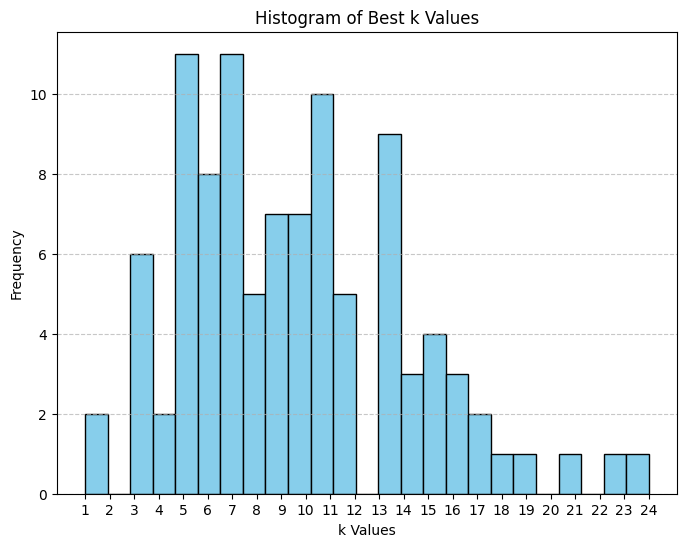

In [ ]:
# Histogram of best k-values
plt.figure(figsize=(8, 6))
plt.hist(best_k_values, bins=25, color='skyblue', edgecolor='black')
plt.xticks(range(1,25))
plt.title('Histogram of Best k Values')
plt.xlabel('k Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analyzing the results of the code we can see different relevant aspects.

First we can see that we have a high training mean accuracy (0.975) that suggest that the model is fitting the training data very well. Also we have a low train accuracy deviation that inidicates stable performance across different training set splits. And a very low SEM (0.001) that indicates that the mean accuracy is likely to be close to the true mean accuracy of the model on the training dataset.

This very good results in the training dataset could indicate that the model adjust very good to the data, but we have to test it in the test datasets due to the risk of overfitting.

So, we can see that we have a high test mean accuracy (0.963) indicates that the model performs well on unseen data. Also we have a quite low standard deviation (0.029 ) that indicates that the test accuracy is consistent across different evaluations and a very low SEM (0.003).

Finally, the mean of best K-values is 9.57, but with a
standard deviation of best K-values of 4.643350845101743, so there is a lot of variability in the optimal k values for each training dataset.



### Ex 3. c. What if we need to tune two hyperparameters?

To tune who hyperparameters 'K' and when normalize or not to find what hyperparameters maximize the accuracy we develope the next code:

In [ ]:
def hyperopt_train_test(params):
    # Create a k-NN classifier with the specified number of neighbors (k)
    clf = KNeighborsClassifier(n_neighbors=params['k'])
    if 'normalize' in params:
      if params['normalize'] == 1:
          clf = make_pipeline(StandardScaler(), clf)
    # Evaluate the classifier using cross-validation and return the mean accuracy
    return cross_val_score(clf, X_train, y_train).mean()

# Define the function we want to optimize.
def f(params):
    # Call the hyperopt_train_test function to get accuracy
    acc = hyperopt_train_test(params)
    # Return a dictionary with loss (negative accuracy) and status
    return {'loss': -acc, 'status': STATUS_OK}

space = {
    'k': hp.choice('k', range(1, 25)),
    'normalize': hp.choice('normalize', [True, False])
}

test_acc_score = []
train_acc_score =[]
best_k_values = []

for i in range(1,101):
  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = i)

  best = fmin(f, space, algo=tpe.suggest, max_evals=100)

  # Extract the best value of k from the optimization results
  best_k = space_eval(space,best)['k']
  best_k_values.append(best_k)

  #choose if normalize or not
  bool_normalize = space_eval(space, best)['normalize']
  print(bool_normalize)

  # Create a k-NN classifier with the best hyperparameter (k)
  clf = KNeighborsClassifier(n_neighbors=best_k)
  if bool_normalize == True:
    clf = make_pipeline(StandardScaler(), clf)

  # Train the classifier on the training set
  clf.fit(X_train, y_train)

  # Make predictions on the training and testing sets
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)

  # Calculate accuracy scores for the test and train dataset in the 100 iteriations.
  test_acc_score.append(accuracy_score(y_test, y_test_pred))
  train_acc_score.append(accuracy_score(y_train, y_train_pred))

100%|██████████| 100/100 [00:03<00:00, 32.86trial/s, best loss: -0.9833333333333334]
True
100%|██████████| 100/100 [00:02<00:00, 36.04trial/s, best loss: -0.9583333333333334]
False
100%|██████████| 100/100 [00:03<00:00, 29.02trial/s, best loss: -0.9833333333333334]
False
100%|██████████| 100/100 [00:03<00:00, 27.77trial/s, best loss: -0.9833333333333334]
False
100%|██████████| 100/100 [00:02<00:00, 35.54trial/s, best loss: -0.9666666666666666]
False
100%|██████████| 100/100 [00:02<00:00, 35.40trial/s, best loss: -0.9916666666666668]
False
100%|██████████| 100/100 [00:02<00:00, 35.79trial/s, best loss: -0.975]
False
100%|██████████| 100/100 [00:03<00:00, 25.26trial/s, best loss: -0.975]
False
100%|██████████| 100/100 [00:03<00:00, 32.37trial/s, best loss: -0.975]
False
100%|██████████| 100/100 [00:03<00:00, 33.16trial/s, best loss: -0.9583333333333334]
True
100%|██████████| 100/100 [00:02<00:00, 34.43trial/s, best loss: -0.9666666666666668]
False
100%|██████████| 100/100 [00:03<00:00, 2

In [ ]:
import math
#Mean, Stdv and SEM of the set of 100 accuracy results on test data.
print('Test mean accuracy {:.3f}'.format(np.mean(test_acc_score)))
stdv_acc_test = np.std(test_acc_score,ddof =1)
print('Test accuracy standard deviation {:.3f}'.format(stdv_acc_test))
print('Test standard error of the mean SME {:.3f}'.format(stdv_acc_test/math.sqrt(len(test_acc_score))))

#Mean, Stdv and SEM of the set of 100 accuracy results on train data.
print('Training mean accuracy {:.3f}'.format(np.mean(train_acc_score)))
stdv_acc_train = np.std(train_acc_score,ddof =1)
print('Train accuracy standard deviation {:.3f}'.format(stdv_acc_train))
print('Train standard error of the mean SME {:.3f}'.format(stdv_acc_train/math.sqrt(len(train_acc_score))))


print(f'Mean of best K-values: {np.mean(best_k_values)}')
print(f'Standard deviation of best K-values: {np.std(best_k_values, ddof =1)}')

Test mean accuracy 0.959
Test accuracy standard deviation 0.028
Test standard error of the mean SME 0.003
Training mean accuracy 0.974
Train accuracy standard deviation 0.011
Train standard error of the mean SME 0.001
Mean of best K-values: 10.02
Standard deviation of best K-values: 4.072524345593841


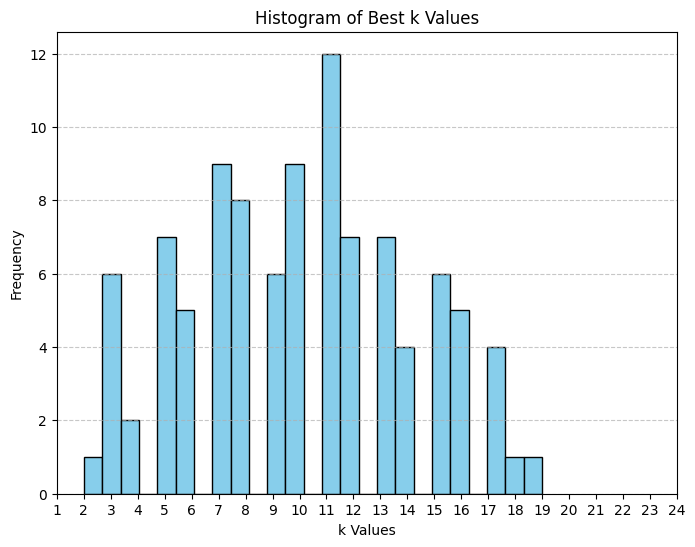

In [ ]:
# Histogram of best k-values
plt.figure(figsize=(8, 6))
plt.hist(best_k_values, bins=25, color='skyblue', edgecolor='black')
plt.xticks(range(1,25))
plt.title('Histogram of Best k Values')
plt.xlabel('k Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We have to point out, that in this case we get a slightly worse result (almost identical), which may seem counter-intuitive because we are doing a double optimisation. This could lead us to think that we would obtain better accuracy at least in the training data, by choosing the best option between normalising or not. However, to choose whether to normalise or not we use the 5-fold cross validation technique (cross_val_score use this by default). However, as this method uses certain partitions of the training set to decide whether to normalise or not and does not use the whole data set, the choice of these partitions may lead to choosing whether to normalise or not, when this decission is not really the most optimal option.
